In [22]:
import pandas as pd

data=pd.read_csv("df_imputed(mean).csv" )

#data


# Specify the columns you want to keep
#columns_to_keep = ['datetime','Load']

# Use indexing to select the desired columns
#df = data[columns_to_keep]
# set the 'datetime_column' as the index
#df.set_index('datetime', inplace=True)
data

,Datetime,Load
0,2019-03-21 00:00:00,454.358527
1,2019-03-21 01:00:00,454.358527
2,2019-03-21 02:00:00,287.419792
3,2019-03-21 03:00:00,258.110368
4,2019-03-21 04:00:00,247.745866
...,...,...
22003,2021-09-22 19:00:00,632.235500
22004,2021-09-22 20:00:00,612.703162
22005,2021-09-22 21:00:00,589.574385
22006,2021-09-22 22:00:00,561.323968


In [23]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [24]:
df=data

In [25]:
df.dtypes

Datetime    datetime64[ns]
Load               float64
dtype: object

In [26]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 4)

In [27]:
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)
X = df.drop(labels=[], axis=1)
y = df['Load']

In [28]:
y

Datetime
2019-03-21 00:00:00    454.358527
2019-03-21 01:00:00    454.358527
2019-03-21 02:00:00    287.419792
2019-03-21 03:00:00    258.110368
2019-03-21 04:00:00    247.745866
                          ...    
2021-09-22 19:00:00    632.235500
2021-09-22 20:00:00    612.703162
2021-09-22 21:00:00    589.574385
2021-09-22 22:00:00    561.323968
2021-09-22 23:00:00    522.105758
Name: Load, Length: 22008, dtype: float64

In [29]:
X

,Load
Datetime,
2019-03-21 00:00:00,454.358527
2019-03-21 01:00:00,454.358527
2019-03-21 02:00:00,287.419792
2019-03-21 03:00:00,258.110368
2019-03-21 04:00:00,247.745866
...,...
2021-09-22 19:00:00,632.235500
2021-09-22 20:00:00,612.703162
2021-09-22 21:00:00,589.574385


In [30]:
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [31]:
X_train.index

DatetimeIndex(['2019-03-21 00:00:00', '2019-03-21 01:00:00',
               '2019-03-21 02:00:00', '2019-03-21 03:00:00',
               '2019-03-21 04:00:00', '2019-03-21 05:00:00',
               '2019-03-21 06:00:00', '2019-03-21 07:00:00',
               '2019-03-21 08:00:00', '2019-03-21 09:00:00',
               ...
               '2021-03-23 05:00:00', '2021-03-23 06:00:00',
               '2021-03-23 07:00:00', '2021-03-23 08:00:00',
               '2021-03-23 09:00:00', '2021-03-23 10:00:00',
               '2021-03-23 11:00:00', '2021-03-23 12:00:00',
               '2021-03-23 13:00:00', '2021-03-23 14:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=17607, freq=None)

In [52]:
X_test[:40]

array([[[0.16686664],
        [0.17647704],
        [0.19191301],
        [0.21204246],
        [0.27237627],
        [0.32952154],
        [0.31344852],
        [0.29130414],
        [0.26603022],
        [0.22525044],
        [0.16399508],
        [0.11359253],
        [0.08528313],
        [0.06921531],
        [0.06632941],
        [0.06542665],
        [0.0448482 ],
        [0.05450979],
        [0.08450475],
        [0.1393362 ],
        [0.17798394],
        [0.18913222],
        [0.18277275],
        [0.16584058]],

       [[0.17647704],
        [0.19191301],
        [0.21204246],
        [0.27237627],
        [0.32952154],
        [0.31344852],
        [0.29130414],
        [0.26603022],
        [0.22525044],
        [0.16399508],
        [0.11359253],
        [0.08528313],
        [0.06921531],
        [0.06632941],
        [0.06542665],
        [0.0448482 ],
        [0.05450979],
        [0.08450475],
        [0.1393362 ],
        [0.17798394],
        [0.18913222],
        

In [32]:
X_test.index

DatetimeIndex(['2021-03-23 15:00:00', '2021-03-23 16:00:00',
               '2021-03-23 17:00:00', '2021-03-23 18:00:00',
               '2021-03-23 19:00:00', '2021-03-23 20:00:00',
               '2021-03-23 21:00:00', '2021-03-23 22:00:00',
               '2021-03-23 23:00:00', '2021-03-24 00:00:00',
               ...
               '2021-09-22 14:00:00', '2021-09-22 15:00:00',
               '2021-09-22 16:00:00', '2021-09-22 17:00:00',
               '2021-09-22 18:00:00', '2021-09-22 19:00:00',
               '2021-09-22 20:00:00', '2021-09-22 21:00:00',
               '2021-09-22 22:00:00', '2021-09-22 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=4401, freq=None)

<Axes: xlabel='Datetime'>

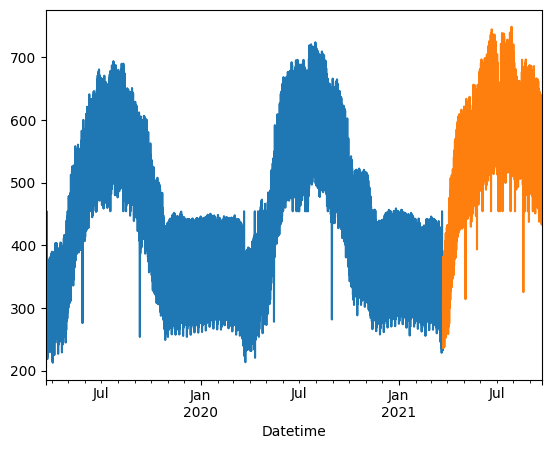

In [33]:
def price2num(x):
    if type(x) == str:
        x = x.strip('$').replace(',', '')
    return float(x)


#function to convert price from string to floats
y_train=y_train.apply(price2num)
y_train.groupby('Datetime').mean().plot()
y_test=y_test.apply(price2num)
y_test.groupby('Datetime').mean().plot()

In [34]:
print(X_train.shape, X_test.shape)

(17607, 1) (4401, 1)


In [35]:
y_train.shape

(17607,)

In [36]:
from sklearn.preprocessing import MinMaxScaler

f_columns = ['Load']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(X_train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(y_train.to_numpy().reshape(-1, 1))  # Fit the target transformer to the training data

X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
y_train = t_transformer.transform(y_train.to_numpy().reshape(-1, 1))  # Apply target transformation to the training data

X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data
y_test = t_transformer.transform(y_test.to_numpy().reshape(-1, 1))  # Apply target transformation to the test data

<ipython-input-36-4d9097f2dad2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, f_columns] = f_transformer.transform(X_train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-36-4d9097f2dad2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, f_columns] = f_transformer.transform(X_test[f_columns].to_numpy())  # Apply feature transformation to the test data


In [37]:
import numpy as np

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [38]:
time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(X_train, y_train, time_steps)  # Create the training dataset using the 'create_dataset' function

X_test, y_test = create_dataset(X_test, y_test, time_steps)  # Create the test dataset using the 'create_dataset' function



print(X_train.shape,y_train.shape,X_test.shape,  y_test.shape)

(17583, 24, 1) (17583, 1) (4377, 24, 1) (4377, 1)


In [39]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [40]:


def build_model(num_layers, units, dropout_rates):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.017831937837284338),
        loss='mean_squared_error'
      # , metrics=['mae','mape']
        )
    return model

# Optimized hyperparameters
num_layers = 1
units = [124 ]
dropout_rates = [0.06269726620087565 ]


model = build_model(num_layers, units, dropout_rates)

# Create an instance of EarlyStopping callback
custom_early_stopping = EarlyStopping(
    monitor='val_loss',  # Quantity to monitor for early stopping (validation loss)
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    start_from_epoch=20
)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2
    ,callbacks=[custom_early_stopping]
   )

Epoch 1/200
440/440 [==============================] - 15s 29ms/step - loss: 0.0551 - val_loss: 0.0038
Epoch 2/200
440/440 [==============================] - 12s 27ms/step - loss: 0.0081 - val_loss: 0.0024
Epoch 3/200
440/440 [==============================] - 12s 28ms/step - loss: 0.0062 - val_loss: 0.0019
Epoch 4/200
440/440 [==============================] - 12s 28ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 5/200
440/440 [==============================] - 12s 27ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 6/200
440/440 [==============================] - 12s 27ms/step - loss: 0.0031 - val_loss: 0.0012
Epoch 7/200
440/440 [==============================] - 12s 28ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 8/200
440/440 [==============================] - 12s 28ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 9/200
440/440 [==============================] - 12s 28ms/step - loss: 0.0024 - val_loss: 6.6517e-04
Epoch 10/200
440/440 [==============================] - 12s 28ms/step

In [41]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 124)               62496     
                                                                 
 dropout_1 (Dropout)         (None, 124)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 62621 (244.61 KB)
Trainable params: 62621 (244.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'val_loss'])


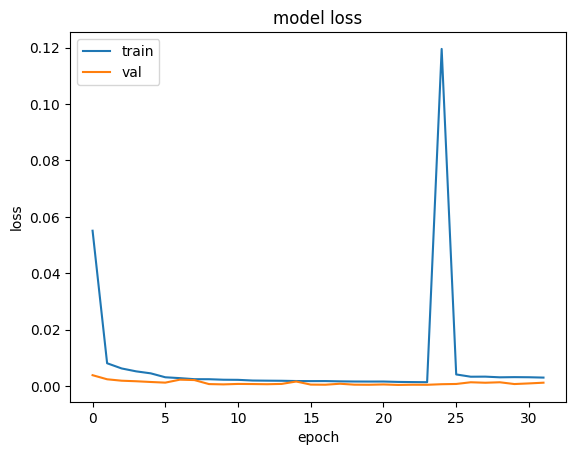

In [42]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [43]:
from math import sqrt
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)  #test
y_pred_train = model.predict(X_train) #train
#y_pred_val = model.predict(X_validate)  #val


#inverse
#train inv
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))  #train actual
y_pred_train_inv = t_transformer.inverse_transform(y_pred_train)  #train

#test inv
y_test_inv = t_transformer.inverse_transform(y_test.reshape((len(y_test), 1)))  #test_actual
y_pred_inv = t_transformer.inverse_transform(y_pred)  #test

#val inv
#y_validate_inv = t_transformer.inverse_transform(y_validate.reshape(-1, 1))
#y_pred_val_inv = t_transformer.inverse_transform(y_pred_val)

550/550 [==============================] - 5s 10ms/step


Train

In [50]:
# Create a DataFrame with predicted and actual values
df_results = pd.DataFrame({
    #"Datetime": Datetime_column,  # Replace with your datetime column
    "Predicted": y_pred_inv.flatten(),
    "Actual": y_test_inv.flatten()
})

# Print the DataFrame
print(df_results)

       Predicted      Actual
0     308.682678  291.394602
1     307.278412  297.254720
2     318.438965  301.377388
3     325.186707  311.993927
4     342.641479  349.286351
...          ...         ...
4372  630.319397  632.235500
4373  642.836792  612.703162
4374  618.757324  589.574385
4375  576.268433  561.323968
4376  525.305969  522.105758

[4377 rows x 2 columns]


In [49]:
# Print the predicted values and actual values in two columns
print("Predicted\tActual")
for pred, actual in zip(y_pred_inv, y_test_inv):
    print(f"{pred[0]}\t\t{actual[0]}")

Predicted	Actual
308.68267822265625		291.394602
307.2784118652344		297.25472
318.43896484375		301.377388
325.18670654296875		311.993927
342.6414794921875		349.286351
382.5303649902344		381.911799
400.4322204589844		371.744897
376.84912109375		356.32591
358.50445556640625		342.898926
346.4734802246094		328.794386
327.72344970703125		297.100291
290.7359619140625		271.102754
269.39727783203125		256.956414
266.47076416015625		250.083746
264.8289794921875		246.782099
261.9831848144531		245.79881
259.75146484375		239.871335
255.46279907226562		248.994838
271.910400390625		265.214903
295.4399108886719		292.330893
320.8218994140625		314.417701
334.2492980957031		317.338811
327.3721923828125		304.365352
309.50555419921875		293.631644
302.6851806640625		291.36031
308.0204772949219		289.827847
308.55889892578125		296.818253
319.0635681152344		308.468563
341.03302001953125		350.087353
384.39935302734375		391.002395
407.03997802734375		381.385821
381.8052062988281		370.17009
367.08673095703125		358

In [44]:
y_train_inv2 = (y_train_inv.reshape(-1, 1))
#y_train_inv2.shape


# calculate RMSE
rmse = sqrt(mean_squared_error(y_train_inv2, y_pred_train_inv))
print('Train RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_train_inv2, y_pred_train_inv)
print('Train MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_train_inv2, y_pred_train_inv)
print('Train MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_train_inv2
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Train NRMSE: %.9f' % Nrmse_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_train_inv2, y_pred_train_inv)
print('R2 score: %.9f' % r2)

Train RMSE: 21.273439296
Train MAE: 16.742808616
Train MAPE: 0.041717956
Train NRMSE: 0.041606702
R2 score: 0.968918442


Test

In [45]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test_inv, y_pred_inv)
print('Test MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print('Test MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_test_inv
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Test NRMSE: %.9f' % Nrmse_test)


from sklearn.metrics import r2_score
r2 = r2_score(y_test_inv, y_pred_inv)
print('R2 score: %.9f' % r2)


Test RMSE: 27.598840403
Test MAE: 19.728589533
Test MAPE: 0.037526733
Test NRMSE: 0.054030392
R2 score: 0.916591697


Text(0.5, 1.0, 'Load forecasting')

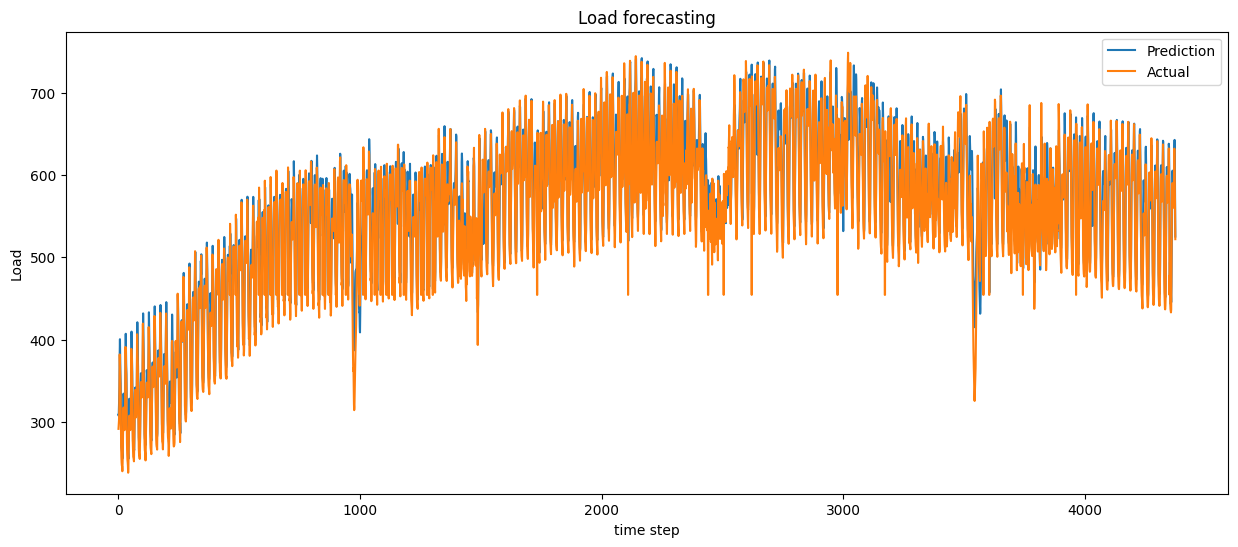

In [47]:
plt.figure(figsize=(15,6))

plt.plot(y_pred_inv, label="Prediction" )
plt.plot(y_test_inv, label="Actual")
plt.legend()
plt.ylabel('Load')
plt.xlabel('time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load forecasting')

#plt.xlim(
#  xmin=-10, xmax=2200
#)
#plt.show()


#plt.savefig("ALLSKY_SRF_ALB.svg")
#plt.savefig("ALLSKY_SRF_ALB.png", format="png", dpi=300)
#plt.savefig('ALLSKY_SRF_ALB.eps', format='eps')




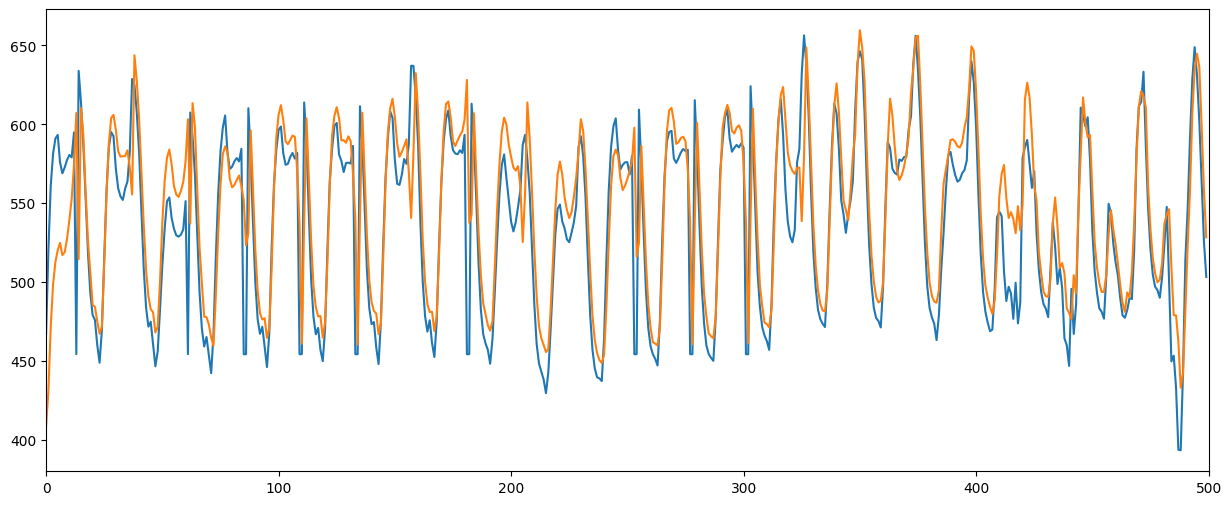

In [48]:
#zoom in spikes


plt.figure(figsize=(15,6))

plt.plot(y_test_inv[1000:1500])
plt.plot(y_pred_inv[1000:1500])
plt.xlim(
  xmin=0, xmax=500
)
#plt.show()




plt.savefig("SZA_zoomin.svg")
plt.savefig("SZA_zoomin.png", format="png", dpi=300)
plt.savefig('SZA_zoomin.eps', format='eps')
